In [3]:
pip install ezc3d

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ezc3d
import os

In [4]:
test_167=ezc3d.c3d("/Users/ellisschwartz/Desktop/Biomechanics/c3ds/000056_000167_72_194_R_004_978.c3d")
test_383=ezc3d.c3d("/Users/ellisschwartz/Desktop/Biomechanics/c3ds/000094_000383_72_198_L_012_1038.c3d")
test_282=ezc3d.c3d("/Users/ellisschwartz/Desktop/Biomechanics/c3ds/000080_000282_71_188_R_010_1070.c3d")
ctrl_86=ezc3d.c3d("/Users/ellisschwartz/Desktop/Biomechanics/c3ds/000178_000086_74_228_R_017_1004.c3d")
ctrl_426=ezc3d.c3d("/Users/ellisschwartz/Desktop/Biomechanics/c3ds/000231_000426_70_204_R_006_986.c3d")
ctrl_24=ezc3d.c3d("/Users/ellisschwartz/Desktop/Biomechanics/c3ds/000116_000024_73_212_R_018_988.c3d")
ctrl_300=ezc3d.c3d("/Users/ellisschwartz/Desktop/Biomechanics/c3ds/000079_000300_76_214_R_013_957.c3d")




In [18]:

points = test_282["data"]["points"]
marker_names = test_282["parameters"]["POINT"]["LABELS"]["value"]

def get_marker_xy(marker):
    idx = marker_names.index(marker)
    # Take only X and Y (ignore Z)
    return points[:2, idx, :].T  # shape: (frames, 2)

LASI_xy = get_marker_xy("LASI")
RASI_xy = get_marker_xy("RASI")
LSHO_xy = get_marker_xy("LSHO")
RSHO_xy = get_marker_xy("RSHO")


In [19]:
def segment_angle_xy(left_xy, right_xy):
    """
    Compute segment angle (deg) in XY plane
    """
    vec = right_xy - left_xy
    return np.degrees(np.arctan2(vec[:, 1], vec[:, 0]))


In [20]:
pelvis_angle = segment_angle_xy(LASI_xy, RASI_xy)
shoulder_angle = segment_angle_xy(LSHO_xy, RSHO_xy)

In [21]:
angle_diff = shoulder_angle - pelvis_angle
# unwrap to avoid ±180° jumps
angle_diff = np.unwrap(np.radians(angle_diff))
angle_diff = np.degrees(angle_diff)

In [22]:
point_rate = test_282["parameters"]["POINT"]["RATE"]["value"][0]
n_frames = points.shape[2]
time = np.arange(n_frames) / point_rate

max_idx = np.argmin(angle_diff)
max_sep = angle_diff[max_idx]
time_of_max = time[max_idx]

print(f"Max XY-plane pelvis–shoulder separation: {max_sep:.2f}°")
print(f"Time of max separation: {time_of_max:.3f} s")

Max XY-plane pelvis–shoulder separation: -38.78°
Time of max separation: 1.628 s


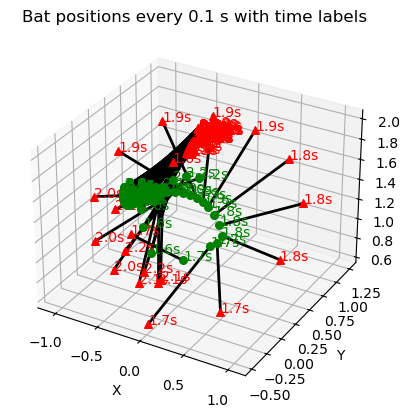

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1️⃣ Extract markers
# -------------------------
points = test_282["data"]["points"]
marker_names = test_282["parameters"]["POINT"]["LABELS"]["value"]

def get_marker_xyz(marker):
    idx = marker_names.index(marker)
    return points[:3, idx, :].T  # shape: (frames, 3)

bat_knob = get_marker_xyz("Marker1")
bat_end = get_marker_xyz("Marker2")

n_frames = points.shape[2]
point_rate = test_282["parameters"]["POINT"]["RATE"]["value"][0]
time = np.arange(n_frames) / point_rate

# -------------------------
# 2️⃣ Choose frames every 0.1 s
# -------------------------
times_to_plot = np.arange(0, time[-1], 0.03)  # 0, 0.1, 0.2, ...

# -------------------------
# 3️⃣ Plot each frame
# -------------------------
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for t in times_to_plot:
    frame_idx = np.argmin(np.abs(time - t))
    
    # Bat shaft
    ax.plot([bat_knob[frame_idx,0], bat_end[frame_idx,0]],
            [bat_knob[frame_idx,1], bat_end[frame_idx,1]],
            [bat_knob[frame_idx,2], bat_end[frame_idx,2]],
            color='black', linewidth=2)
    
    # Bat knob (green)
    ax.scatter(bat_knob[frame_idx,0], bat_knob[frame_idx,1], bat_knob[frame_idx,2],
               c='green', marker='o', s=30)
    ax.text(bat_knob[frame_idx,0], bat_knob[frame_idx,1], bat_knob[frame_idx,2],
            f'{t:.1f}s', color='green')
    
    # Bat end (red)
    ax.scatter(bat_end[frame_idx,0], bat_end[frame_idx,1], bat_end[frame_idx,2],
               c='red', marker='^', s=30)
    ax.text(bat_end[frame_idx,0], bat_end[frame_idx,1], bat_end[frame_idx,2],
            f'{t:.1f}s', color='red')

# Axes and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Bat positions every 0.1 s with time labels')
plt.show()
